17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
Naive Bayes Accuracy: 0.84
Logistic Regression Accuracy: 0.88
SVM Accuracy: 0.87


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


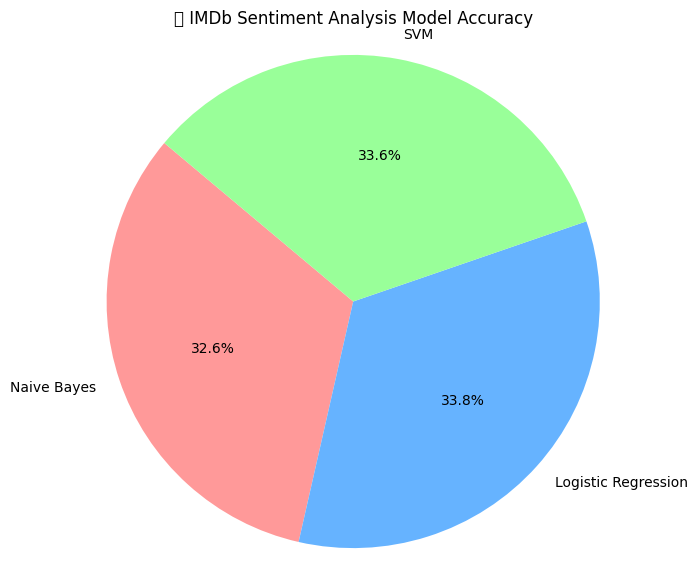

In [3]:
# ========================================================
# 🎬 Movie Sentiment Analysis using IMDb Inbuilt Dataset
# ========================================================

# ✅ Step 1: Install required libraries (minimal for Colab)
!pip install -q scikit-learn matplotlib

# ✅ Step 2: Import necessary libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ✅ Step 3: Load the IMDb dataset from Keras
# Only keep top 5000 most frequent words
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# ✅ Step 4: Decode reviews back to text for vectorization
word_index = imdb.get_word_index()
reverse_word_index = {value + 3: key for key, value in word_index.items()}
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review])

x_train_text = [decode_review(review) for review in x_train]
x_test_text = [decode_review(review) for review in x_test]

# ✅ Step 5: Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vect = vectorizer.fit_transform(x_train_text)
X_test_vect = vectorizer.transform(x_test_text)

# ✅ Step 6: Define classifiers
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear')
}

# ✅ Step 7: Train, Predict & Evaluate
accuracies = {}

for name, model in models.items():
    model.fit(X_train_vect, y_train)
    y_pred = model.predict(X_test_vect)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")

# ✅ Step 8: Plot accuracy results in a pie chart
labels = list(accuracies.keys())
sizes = list(accuracies.values())

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("🎯 IMDb Sentiment Analysis Model Accuracy")
plt.axis('equal')
plt.show()
